### Written by Federica B. Bianco @fedhere
### Implemented and completed by Baiyue Cao (BC1561) @SPTKL 
### NYU CUSP PUI
### Assignment 1 Homework 3
- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

In [6]:
from __future__ import print_function
__author__= 'bc1561'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize

    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
mymean = 100

Adding plotting functions that takes in a distribution and gives histograms and scatter plots with sample size on the x axis and sample mean on the y axis

In [8]:
def plot_hist(dist, title):
    allmeans = list(map(lambda x: x.mean(), dist))
    pl.figure(figsize=(10, 10))
    pl.hist(allmeans,bins=30)
    pl.xlabel('sample mean', fontsize = 18)
    pl.ylabel('N', fontsize = 18)
    pl.title(title, fontsize = 18)

In [9]:
def plot_scatter(dist, size_list, title):
    ax = pl.figure(figsize=(10,6)).add_subplot(111)
    for i in range(100):
        mean = dist[i].mean()
        sample_size = len(dist[i])
        ax.plot(sample_size, mean, 'o')
        ax.set_xlabel('sample size', fontsize=18)
        ax.set_ylabel('sample mean', fontsize=18)
        ax.set_title(title, fontsize=18)
        ax.plot([min(size_list), max(size_list)], [df, df], 'k')

# Do it for the Normal distribution


In [10]:
normal = np.empty(100, dtype=object)
for i in range(100): 
    N = np.random.randint(10, 2000)
    normal[i] = np.random.normal(mymean, size = N)

In [11]:
size_list_normal = list(map(lambda x: len(x), normal))

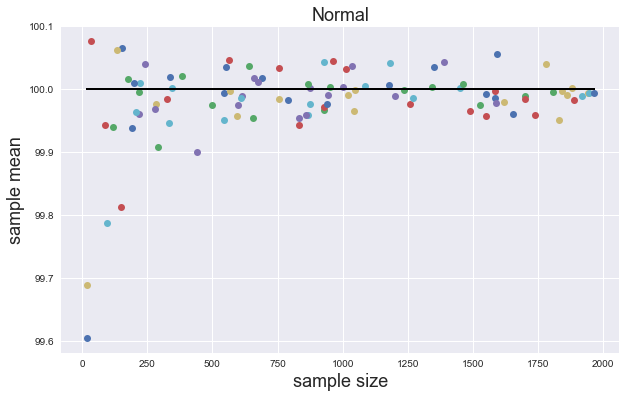

In [12]:
plot_scatter(normal, size_list_normal, 'Normal')

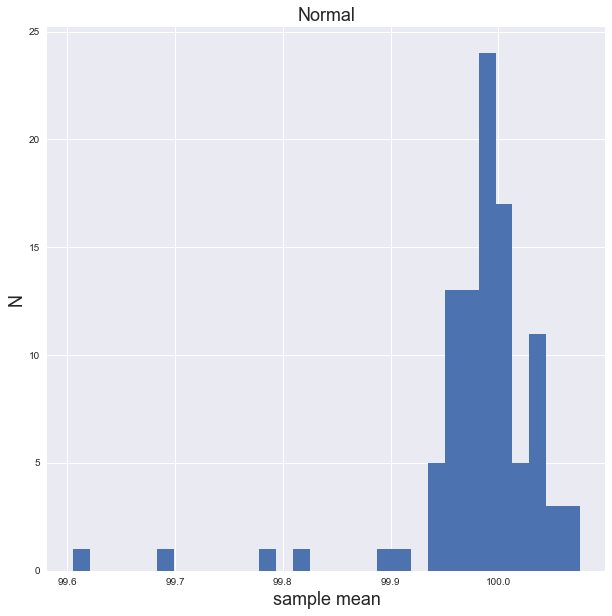

In [13]:
plot_hist(normal, 'Normal')

# Do it for the Poisson distribution

In [14]:
poisson = np.empty(100, dtype=object)
for i in range(100): 
    N = np.random.randint(10, 2000)
    poisson[i] = np.random.poisson(mymean, size = N)
size_list_poisson = list(map(lambda x: len(x), poisson))

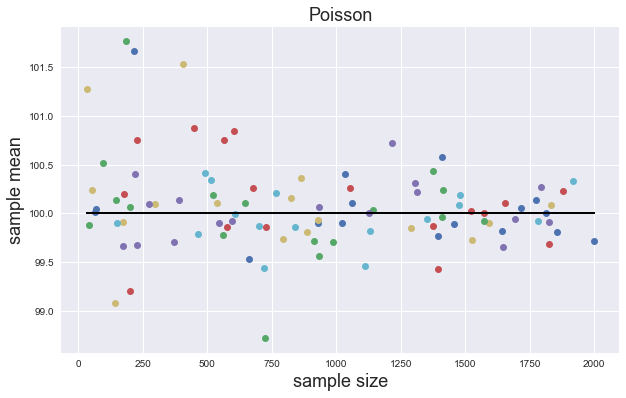

In [15]:
plot_scatter(poisson, size_list_poisson, 'Poisson')

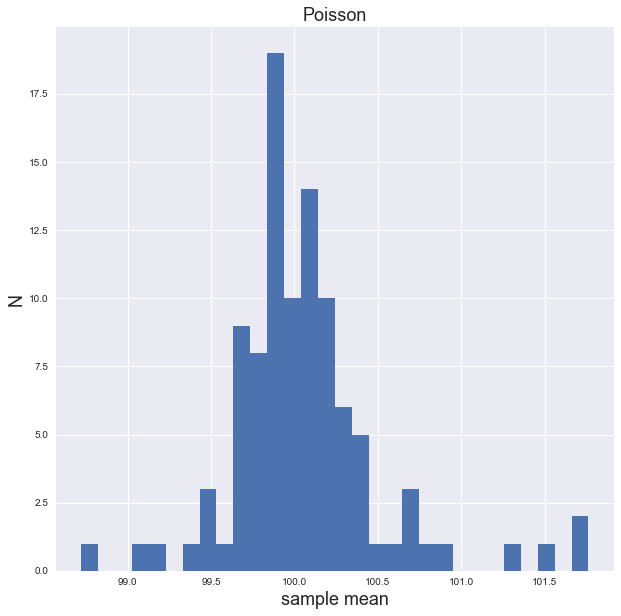

In [16]:
plot_hist(poisson, 'Poisson')

# Do it for the Binomial distribution

In [17]:
binomial = np.empty(100, dtype=object)
for i in range(100): 
    N = np.random.randint(10, 2000)
    binomial[i] = np.random.binomial(200,0.5, size = N)
size_list_binomial = list(map(lambda x: len(x), binomial))

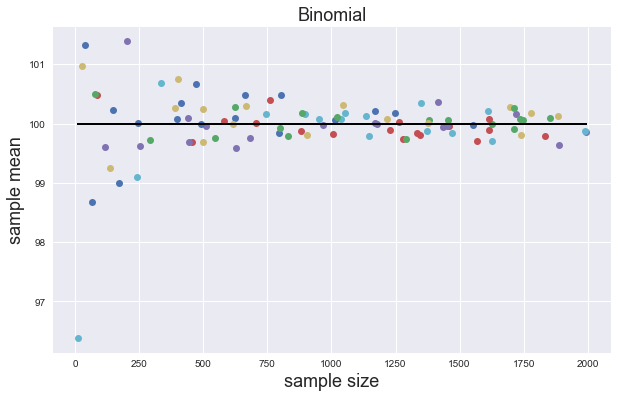

In [18]:
plot_scatter(binomial, size_list_binomial, 'Binomial')

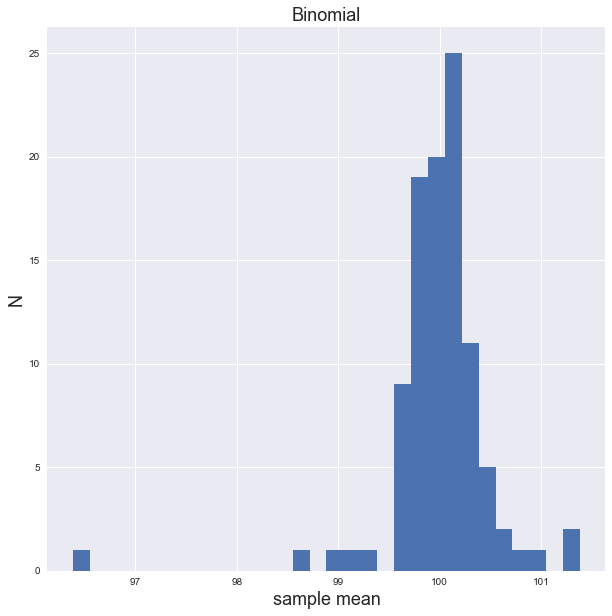

In [19]:
plot_hist(binomial, 'Binomial')

# Do it for another distribution

In [20]:
logistic = np.empty(100, dtype=object)
for i in range(100): 
    N = np.random.randint(10, 2000)
    logistic[i] = np.random.logistic(mymean, 1, size = N)
size_list_logistic = list(map(lambda x: len(x), logistic))

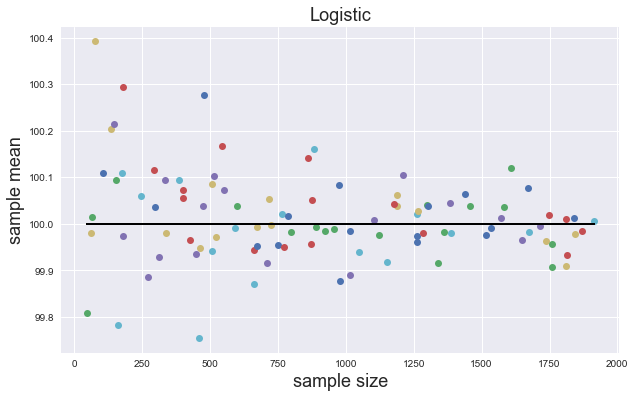

In [21]:
plot_scatter(logistic, size_list_logistic, 'Logistic')

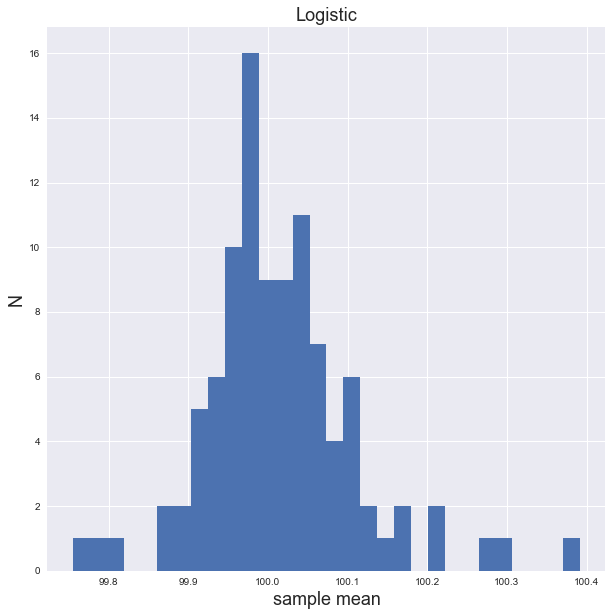

In [22]:
plot_hist(logistic, 'Logistic')

# Chi-square

In [23]:
df = mymean
chisq = np.empty(100, dtype=object)
for i in range(100): 
    N = np.random.randint(10, 2000)
    chisq[i] = np.random.chisquare(df, size = N)
size_list_chisq = list(map(lambda x: len(x), chisq))

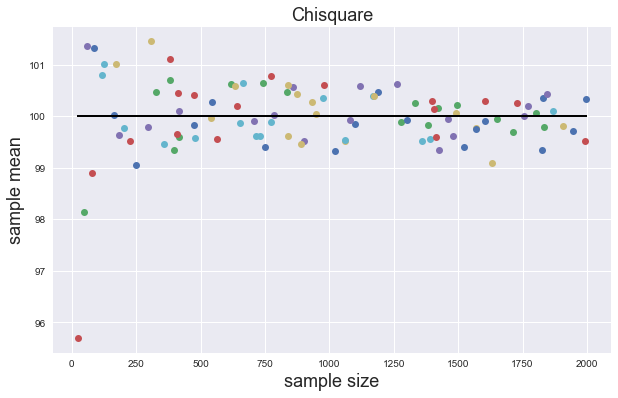

In [24]:
plot_scatter(chisq, size_list_chisq, 'Chisquare')

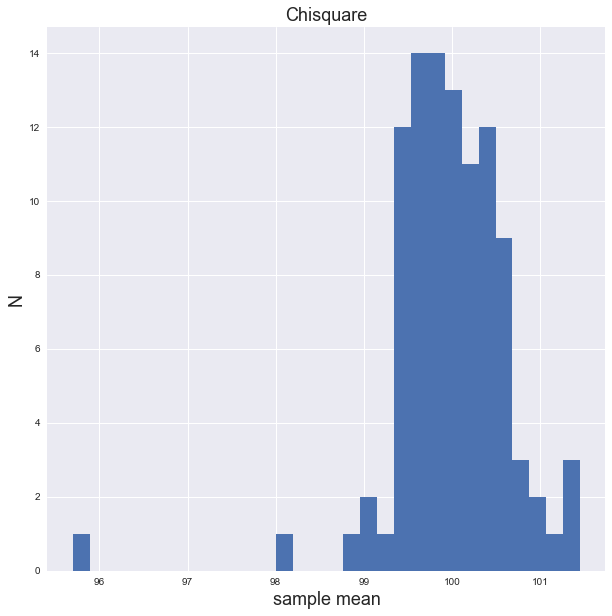

In [25]:
plot_hist(chisq, 'Chisquare')

# extracredit

In [26]:
mean_normal = list(map(lambda x: x.mean(), normal))
mean_chisq = list(map(lambda x: x.mean(), chisq))
mean_logistic = list(map(lambda x: x.mean(), logistic))
mean_binomial = list(map(lambda x: x.mean(), binomial))
mean_poisson = list(map(lambda x: x.mean(), poisson))

In [27]:
mean_all = []
mean_all = mean_normal + mean_chisq + mean_logistic + mean_binomial + mean_poisson
len(mean_all)

500

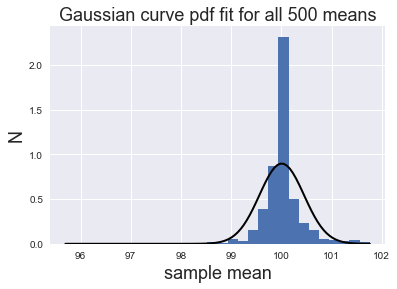

In [30]:
from scipy.stats import norm

mu, std = norm.fit(mean_all)
xmin, xmax = pl.xlim()
x = np.linspace(min(mean_all), max(mean_all), 100)
p = norm.pdf(x, mu, std)

pl.hist(mean_all,bins=30, normed=True)
pl.plot(x, p, 'k', linewidth=2)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Gaussian curve pdf fit for all 500 means', fontsize = 18)
    
plt.show()